# Domain: Social Network
Project 05: Facebook data
Dataset contains pseudo Facebook data.

Attribute Information:
Userid : ID of user
Age : User’s age(years)
dob_day : Day of date of birth(1-31)
dob_year : Year of date of birth 
dob_month : Month of date of birth 
gender : M/F
tenure : How long have facebook users been on site
friend_count : Total number of friends 
friendships_initiated : Friend requests sent
likes : Total number of likes by user
likes_received : Total number of likes received by user 
mobile_likes : Number of likes by user(through mobile)
mobile_likes_received : Number of likes recieved by user(through mobile) 
www_likes : Number of likes by user(through desktop website) 
www_likes_received : Number of likes received by user(through desktop)
    
Exploration ideas:
Date of birth analysis Friend count analysis
Tenure analysis
Data transformations
Frequency polygons, Boxplots.

In [15]:
#Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [16]:
#Read the input file in variable facebook

path = 'C:/Users/Vasu/Desktop/Vasu/LEARNING/data Analytics/UPX/Projects/Project5_Facebook/pseudo_facebook.tsv'
fb = pd.read_csv(path,sep='\t',parse_dates=[[3,4,2]])
fb.tail()

,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945-04-04,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995-03-12,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998-05-10,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990-04-11,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974-05-15,1397896,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [17]:
#facebook variable no of rows and columns
fb.shape

(99003, 13)

In [18]:
#facebook variable column variables and data types
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 13 columns):
dob_year_dob_month_dob_day    99003 non-null datetime64[ns]
userid                        99003 non-null int64
age                           99003 non-null int64
gender                        98828 non-null object
tenure                        99001 non-null float64
friend_count                  99003 non-null int64
friendships_initiated         99003 non-null int64
likes                         99003 non-null int64
likes_received                99003 non-null int64
mobile_likes                  99003 non-null int64
mobile_likes_received         99003 non-null int64
www_likes                     99003 non-null int64
www_likes_received            99003 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 9.8+ MB


In [19]:
#Renaming the date of birth coumn to shorter name as DOB and further setting index of te dataframe as userid

fb.rename(columns = {'dob_year_dob_month_dob_day':'DOB'},inplace=True)
fb = fb.set_index('userid')
fb.head()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,
2094382,1999-11-19,14,male,266.0,0,0,0,0,0,0,0,0
1192601,1999-11-02,14,female,6.0,0,0,0,0,0,0,0,0
2083884,1999-11-16,14,male,13.0,0,0,0,0,0,0,0,0
1203168,1999-12-25,14,female,93.0,0,0,0,0,0,0,0,0
1733186,1999-12-04,14,male,82.0,0,0,0,0,0,0,0,0


In [20]:
#Use describe function to see the various aspects of facebbok data

fb.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [21]:
#Lets try for Q01

fb_males = fb[fb['gender']=='male']
fb_females = fb[fb['gender']=='female']
fb_males = fb_males[['age','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
fb_females = fb_females[['age','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]


In [10]:
fb_females.head()

,age,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,
1192601,14,0,0,0,0,0
1203168,14,0,0,0,0,0
1680361,13,0,0,0,0,0
1932519,13,0,0,0,0,0
1751722,13,0,0,0,0,0


In [22]:
def age_compute(row):
   if row['age'] < 20:
       return '13-19'
   elif row['age'] >= 20 and row['age'] < 40:
       return '20-39'
   elif row['age'] >= 40 and row['age'] < 60:
       return '40-59'
   elif row['age'] >= 60 and row['age'] < 80:
       return '60-79'
   elif row['age'] >= 80 and row['age'] < 100:
       return '80-99'
   elif row['age'] >= 100:
       return '99 Plus'


fb_males['age_group'] = fb_males.apply(age_compute,axis=1)
fb_females['age_group'] = fb_females.apply(age_compute,axis=1)

In [24]:
fb_males=fb_males.groupby('age_group').mean()
fb_males

,age,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age_group,,,,,,
13-19,16.962548,89.056296,70.321927,53.664354,31.744303,35.391942
20-39,26.903357,58.419230,56.084633,36.079330,15.699185,22.339900
40-59,49.048867,52.811423,55.972225,30.810588,22.780620,22.000835
60-79,66.618448,67.696513,47.319685,33.689089,46.235321,34.007424
80-99,89.771912,104.907371,84.744024,63.416335,54.521912,41.491036
99 Plus,105.534533,114.186270,87.619506,73.353704,42.731687,40.832566


In [25]:
fb_females=fb_females.groupby('age_group').mean()
fb_females

,age,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age_group,,,,,,
13-19,16.809547,460.557618,252.705882,268.447927,130.807257,192.109330
20-39,27.078380,253.486519,173.612595,157.023944,60.083900,96.462575
40-59,50.282683,161.521675,155.773101,85.574949,90.699065,75.946726
60-79,66.594641,111.829665,101.359809,53.945455,100.842105,57.884211
80-99,88.630807,117.988998,109.632029,73.000000,56.977995,44.987775
99 Plus,105.604710,162.290898,111.178230,99.622533,75.063654,62.668364


In [26]:
fb_males = fb_males.reset_index()
fb_males

,age_group,age,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,16.962548,89.056296,70.321927,53.664354,31.744303,35.391942
1,20-39,26.903357,58.419230,56.084633,36.079330,15.699185,22.339900
2,40-59,49.048867,52.811423,55.972225,30.810588,22.780620,22.000835
3,60-79,66.618448,67.696513,47.319685,33.689089,46.235321,34.007424
4,80-99,89.771912,104.907371,84.744024,63.416335,54.521912,41.491036
5,99 Plus,105.534533,114.186270,87.619506,73.353704,42.731687,40.832566


In [27]:
fb_females = fb_females.reset_index()
fb_females

,age_group,age,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,16.809547,460.557618,252.705882,268.447927,130.807257,192.109330
1,20-39,27.078380,253.486519,173.612595,157.023944,60.083900,96.462575
2,40-59,50.282683,161.521675,155.773101,85.574949,90.699065,75.946726
3,60-79,66.594641,111.829665,101.359809,53.945455,100.842105,57.884211
4,80-99,88.630807,117.988998,109.632029,73.000000,56.977995,44.987775
5,99 Plus,105.604710,162.290898,111.178230,99.622533,75.063654,62.668364


In [28]:
fb_males = fb_males[['age_group','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
fb_males

,age_group,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,89.056296,70.321927,53.664354,31.744303,35.391942
1,20-39,58.419230,56.084633,36.079330,15.699185,22.339900
2,40-59,52.811423,55.972225,30.810588,22.780620,22.000835
3,60-79,67.696513,47.319685,33.689089,46.235321,34.007424
4,80-99,104.907371,84.744024,63.416335,54.521912,41.491036
5,99 Plus,114.186270,87.619506,73.353704,42.731687,40.832566


In [29]:
fb_females = fb_females[['age_group','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]
fb_females

,age_group,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13-19,460.557618,252.705882,268.447927,130.807257,192.109330
1,20-39,253.486519,173.612595,157.023944,60.083900,96.462575
2,40-59,161.521675,155.773101,85.574949,90.699065,75.946726
3,60-79,111.829665,101.359809,53.945455,100.842105,57.884211
4,80-99,117.988998,109.632029,73.000000,56.977995,44.987775
5,99 Plus,162.290898,111.178230,99.622533,75.063654,62.668364


In [30]:
fb_males.columns = ['age_group','males_likes_received','male_mobile_likes','male_moblikes_received','male_www_likes','male_wwwlks_received']
fb_males

,age_group,males_likes_received,male_mobile_likes,male_moblikes_received,male_www_likes,male_wwwlks_received
0,13-19,89.056296,70.321927,53.664354,31.744303,35.391942
1,20-39,58.419230,56.084633,36.079330,15.699185,22.339900
2,40-59,52.811423,55.972225,30.810588,22.780620,22.000835
3,60-79,67.696513,47.319685,33.689089,46.235321,34.007424
4,80-99,104.907371,84.744024,63.416335,54.521912,41.491036
5,99 Plus,114.186270,87.619506,73.353704,42.731687,40.832566


In [31]:
fb_females.columns = ['age_group','females_likes_received','female_mobile_likes','female_moblikes_received','female_www_likes','female_wwwlks_received']
fb_females

,age_group,females_likes_received,female_mobile_likes,female_moblikes_received,female_www_likes,female_wwwlks_received
0,13-19,460.557618,252.705882,268.447927,130.807257,192.109330
1,20-39,253.486519,173.612595,157.023944,60.083900,96.462575
2,40-59,161.521675,155.773101,85.574949,90.699065,75.946726
3,60-79,111.829665,101.359809,53.945455,100.842105,57.884211
4,80-99,117.988998,109.632029,73.000000,56.977995,44.987775
5,99 Plus,162.290898,111.178230,99.622533,75.063654,62.668364


In [32]:
fb_age_grp = [fb_males,fb_females]
result = pd.concat(fb_age_grp,axis=1)
result



,age_group,males_likes_received,male_mobile_likes,male_moblikes_received,male_www_likes,male_wwwlks_received,age_group,females_likes_received,female_mobile_likes,female_moblikes_received,female_www_likes,female_wwwlks_received
0,13-19,89.056296,70.321927,53.664354,31.744303,35.391942,13-19,460.557618,252.705882,268.447927,130.807257,192.109330
1,20-39,58.419230,56.084633,36.079330,15.699185,22.339900,20-39,253.486519,173.612595,157.023944,60.083900,96.462575
2,40-59,52.811423,55.972225,30.810588,22.780620,22.000835,40-59,161.521675,155.773101,85.574949,90.699065,75.946726
3,60-79,67.696513,47.319685,33.689089,46.235321,34.007424,60-79,111.829665,101.359809,53.945455,100.842105,57.884211
4,80-99,104.907371,84.744024,63.416335,54.521912,41.491036,80-99,117.988998,109.632029,73.000000,56.977995,44.987775
5,99 Plus,114.186270,87.619506,73.353704,42.731687,40.832566,99 Plus,162.290898,111.178230,99.622533,75.063654,62.668364


# SLIDE 13 -Business Question - Does Gender and Age of users effect their likeability in Facebook?

Bar Graph of Average likes received for male and females in various age groups.


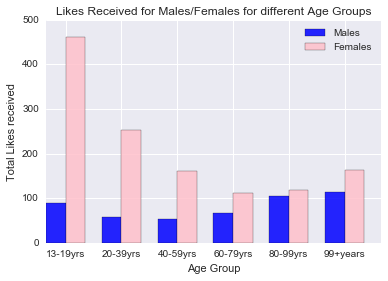

In [36]:
#Histogram of Age-wise Distribution for total number of likes for Males and females.

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['males_likes_received'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['females_likes_received'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('Total Likes received')
plt.title('Likes Received for Males/Females for different Age Groups')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-59yrs','60-79yrs','80-99yrs','99+years'))
plt.legend()

# The Analysis Ends here FOR SLIDE 13 'Bar Graph of Average likes received for male and females in various age groups'

The further analysis below is not part of the PPT Presentation but one can see the same for some more info.

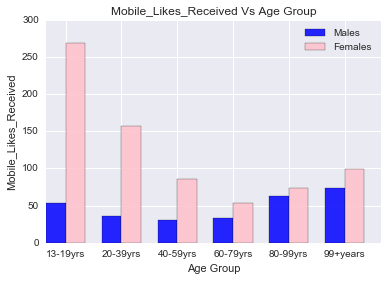

In [37]:
#Lets plot bar graph for 'Age Group' Vs Mobile_Likes_Received

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_moblikes_received'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_moblikes_received'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('Mobile_Likes_Received')
plt.title('Mobile_Likes_Received Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-59yrs','60-79yrs','80-99yrs','99+years'))
plt.legend()

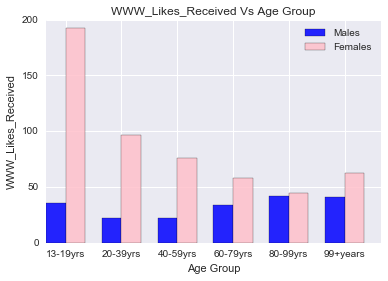

In [38]:
#Lets plot bar graph for 'Age Group' Vs WWW_Likes_Received

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_wwwlks_received'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_wwwlks_received'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('WWW_Likes_Received')
plt.title('WWW_Likes_Received Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-59yrs','60-79yrs','80-99yrs','99+years'))
plt.legend()

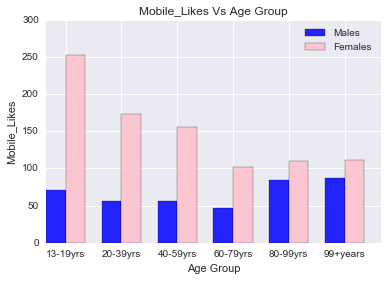

In [39]:
#Lets plot bar graph for 'Age Group' Vs Mobile_Likes

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_mobile_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_mobile_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('Mobile_Likes')
plt.title('Mobile_Likes Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-59yrs','60-79yrs','80-99yrs','99+years'))
plt.legend()

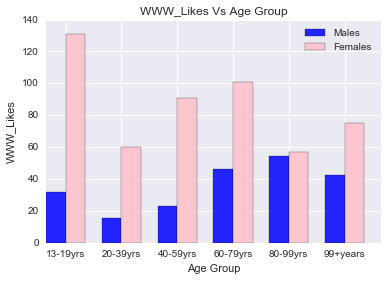

In [40]:
#Lets plot bar graph for 'Age Group' Vs WWW_Likes

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, result['male_www_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Males')
 
rects2 = plt.bar(index + bar_width, result['female_www_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Females')
 
plt.xlabel('Age Group')
plt.ylabel('WWW_Likes')
plt.title('WWW_Likes Vs Age Group')
plt.xticks(index + bar_width, ('13-19yrs', '20-39yrs', '40-59yrs','60-79yrs','80-99yrs','99+years'))
plt.legend()

Conclusion:- Irrespective of one falls in which Age Group, Females are leading. Whether it is mobile_likes_received OR www_likes received, Females likes received count outnumbers the Males.
Well Females are not only leading in the Likes_received rather they are ahead in giving likes also, so whether the likes are provided in Mobile or in WWW, Females are winning this race as well.. :).